# Filtering visualization
Visualising the impacts of dataset filtering on feature diversity on the filtered V2 Akebono dataset.

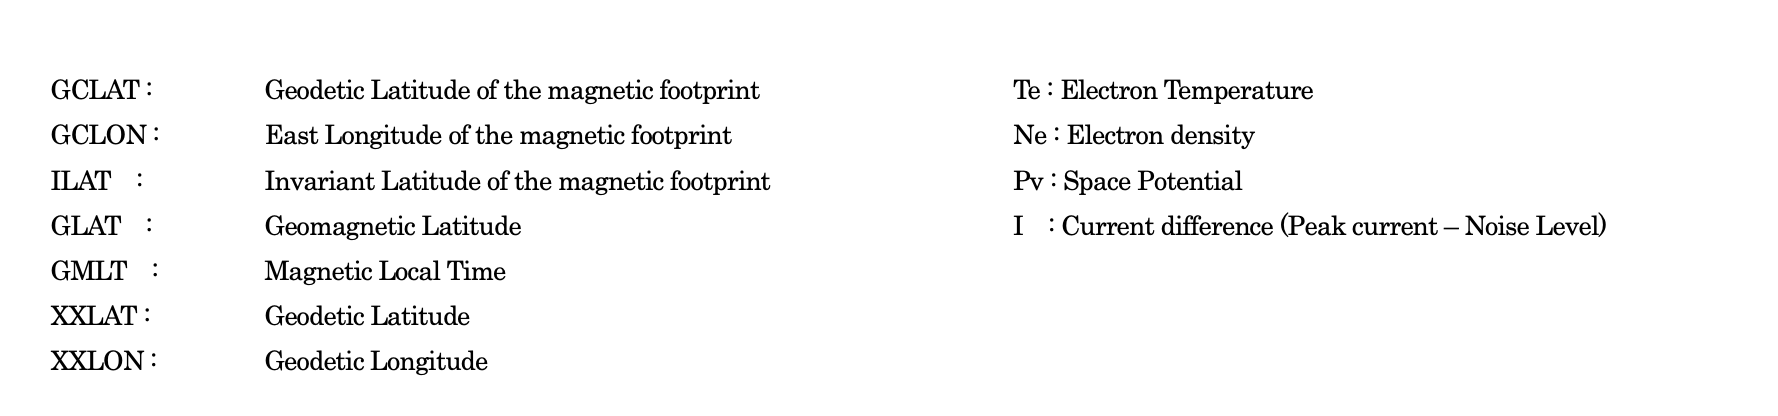

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np

In [3]:
# Load the TSV file
df = pd.read_csv('../../data/Akebono_v2.tsv', sep='\t')

In [5]:
# Convert DateFormatted column to datetime
df['DateFormatted'] = pd.to_datetime(df['DateFormatted'])

# Display the first few rows of the filtered dataframe
print(df.head(3))


   Altitude  GCLAT  GCLON   ILAT  GLAT   GMLT  XXLAT  XXLON   Te1   Ne1   Pv1  \
0   10155.0 -60.19  240.7  51.67 -3.27  19.78 -51.68   19.8  9356  2455  3.28   
1   10134.0 -60.14  240.7  51.63 -2.87  19.78 -51.65   19.8  8658  3281  2.81   
2   10113.0 -60.08  240.6  51.59 -2.47  19.79 -51.60   19.8  8987  3317  2.97   

   I1 DateFormatted  
0  21    1989-03-01  
1  31    1989-03-01  
2  30    1989-03-01  


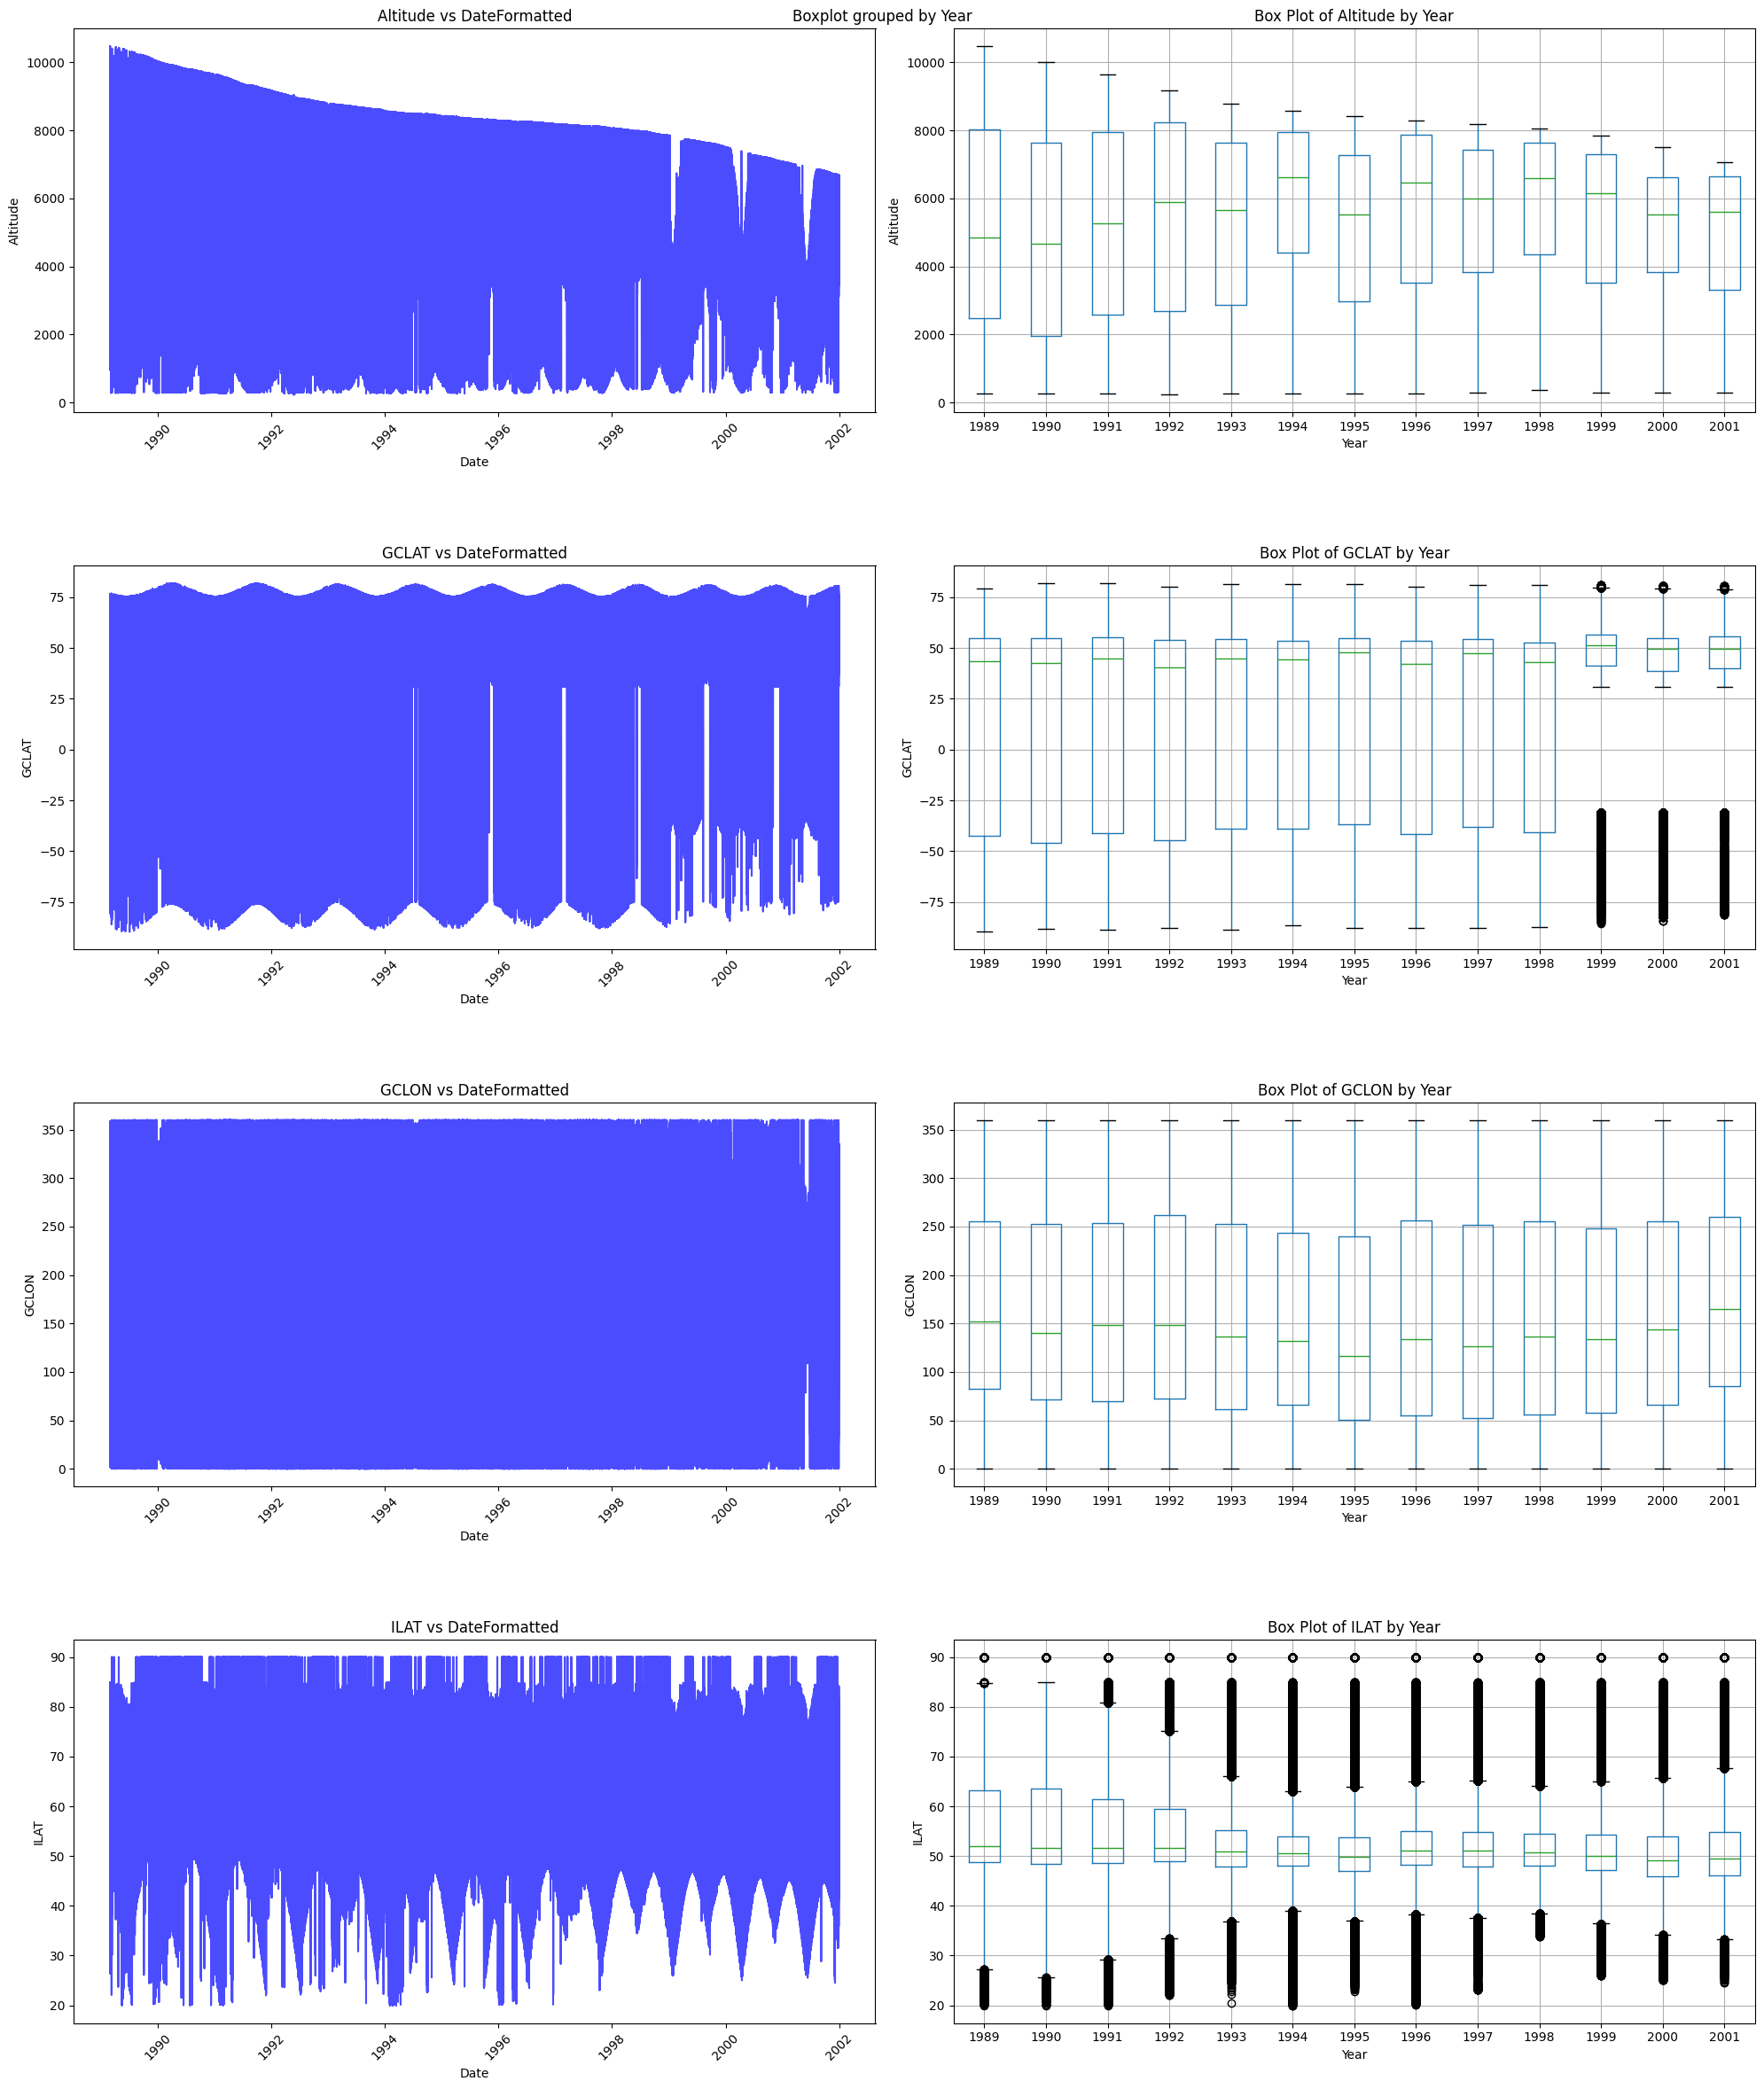

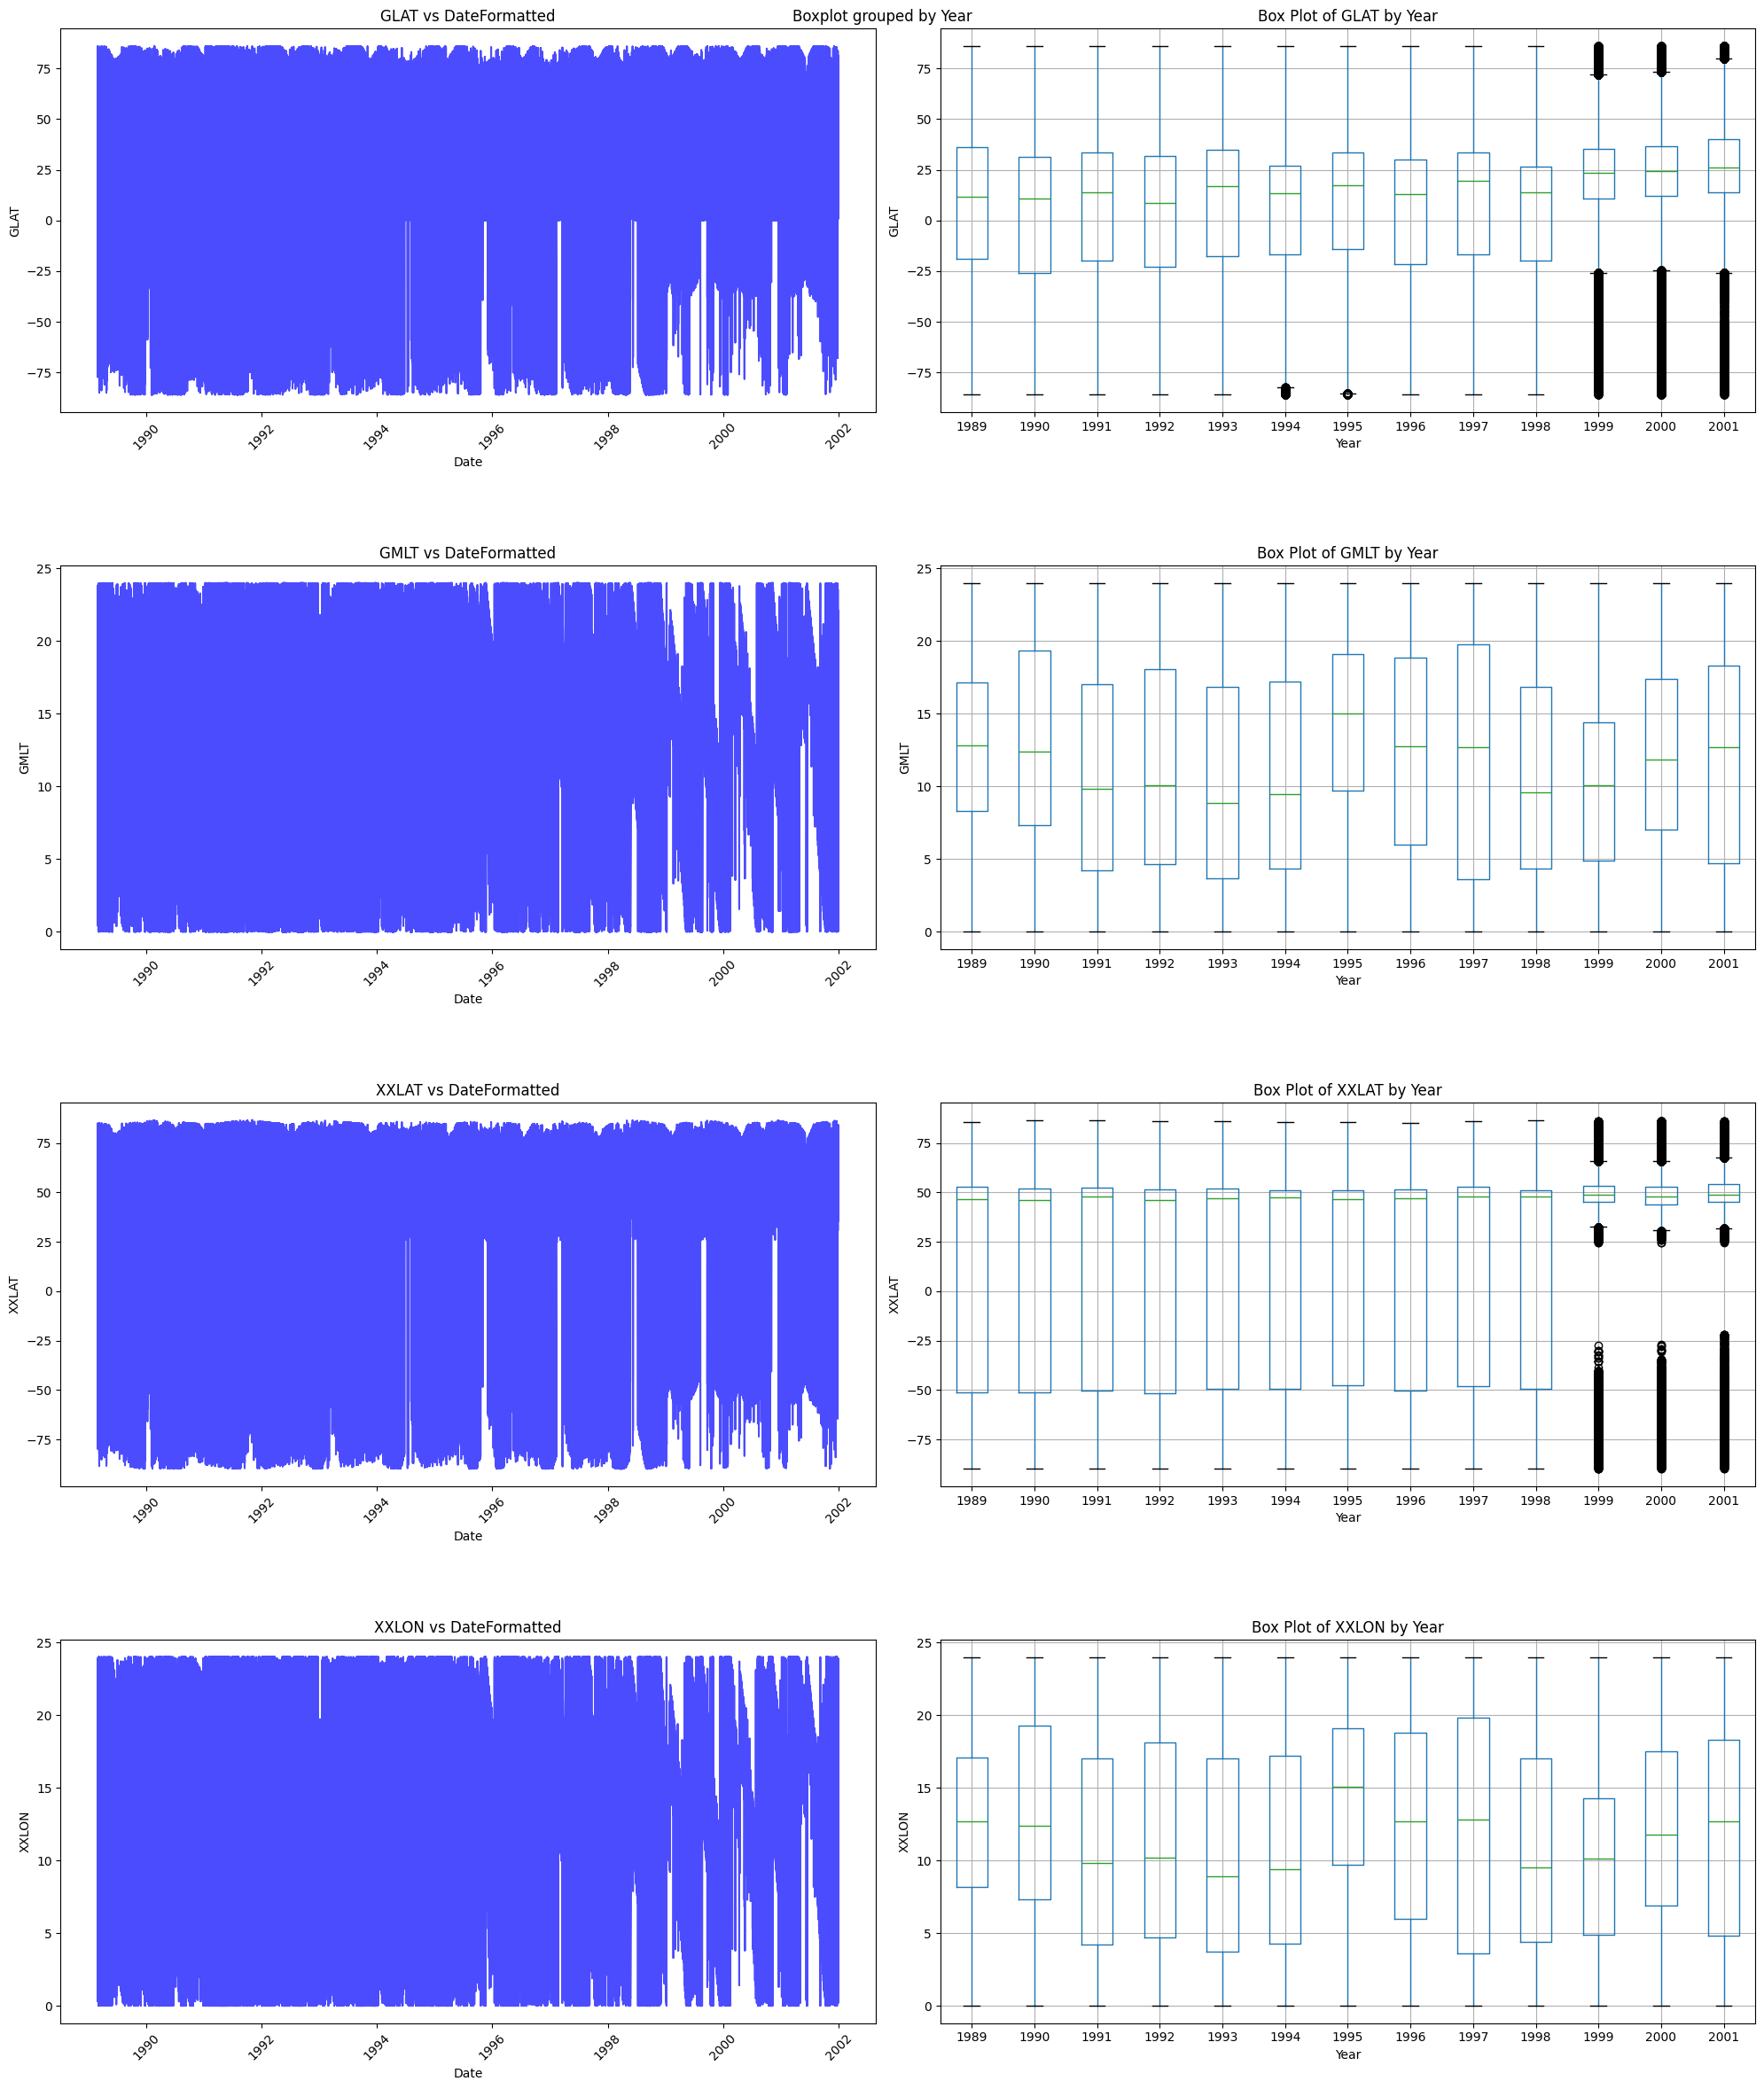

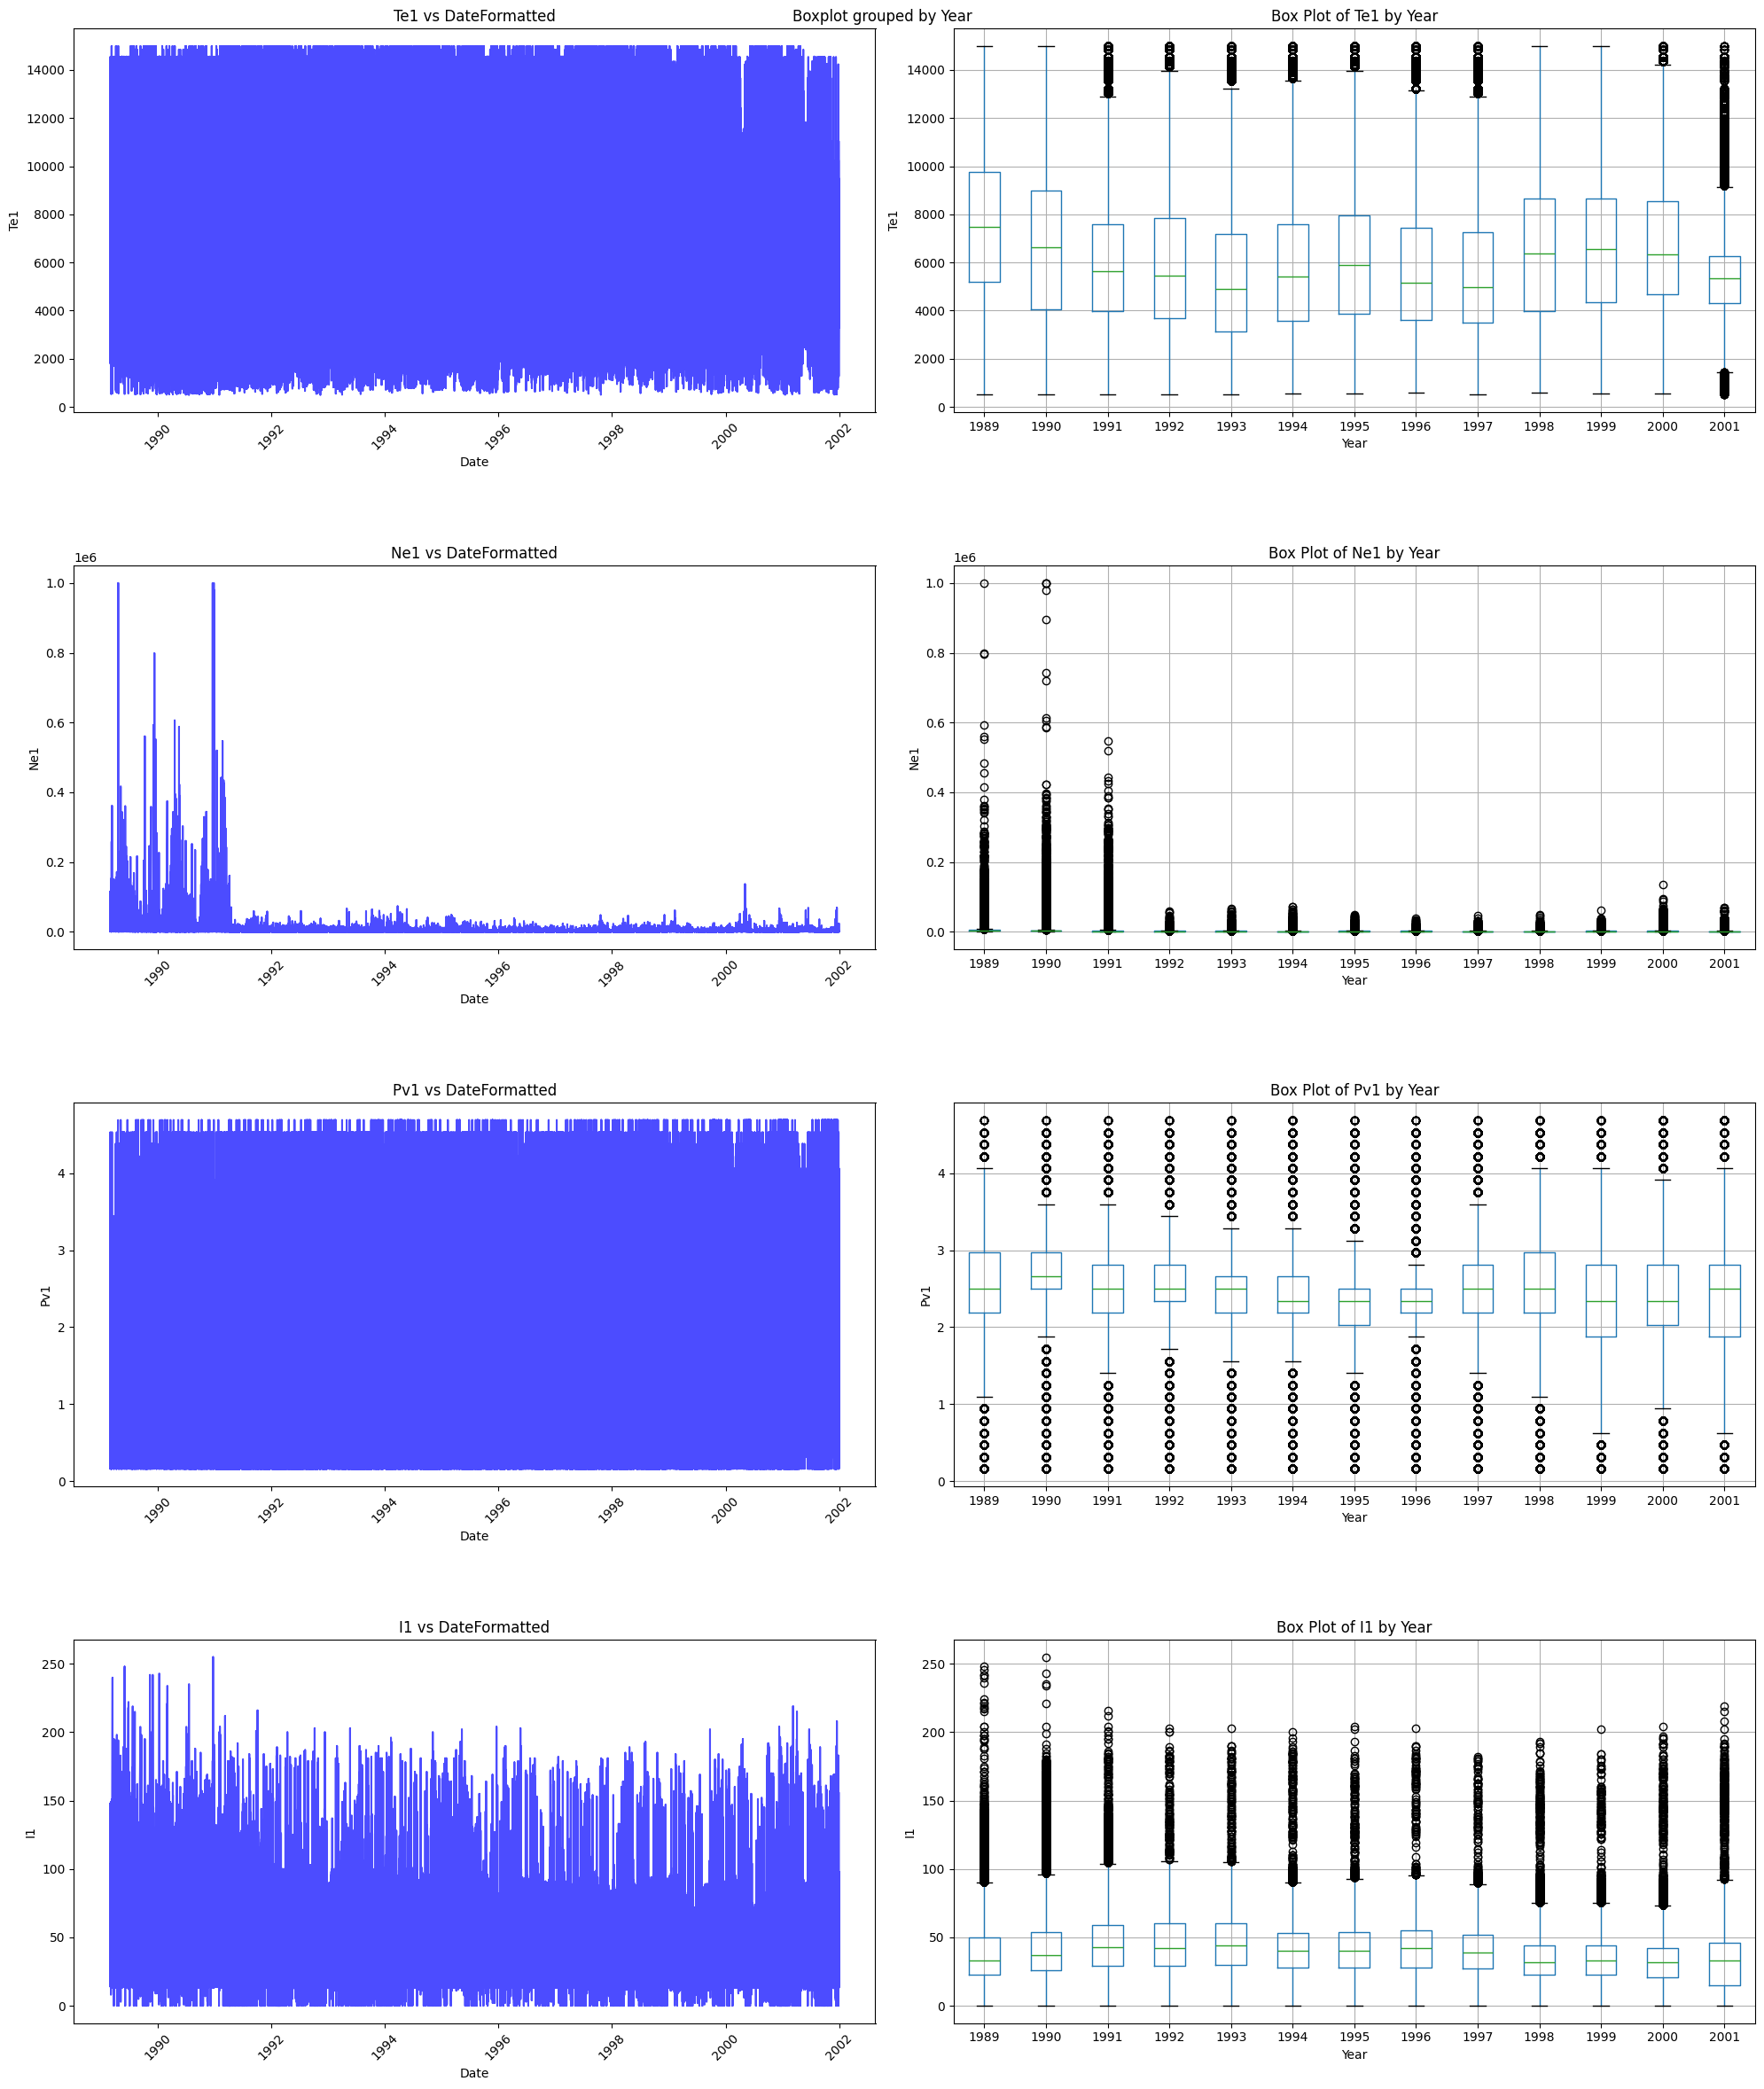

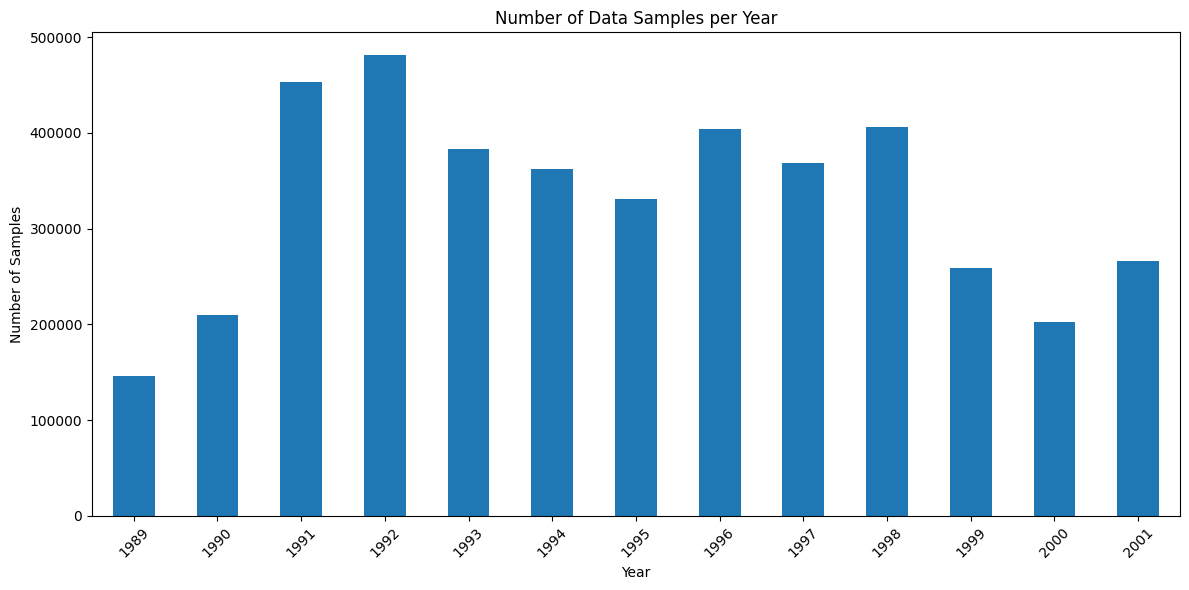

In [6]:
# Exploring filtering based on date time

# Function to plot a subset of columns
def plot_subset(columns_subset):
    plt.figure(figsize=(20, 6 * len(columns_subset)))
    for i, column in enumerate(columns_subset):
        # Time series plot
        plt.subplot(len(columns_subset), 2, 2*i + 1)
        plt.plot(df['DateFormatted'], df[column], 'b-', alpha=0.7)
        plt.title(f'{column} vs DateFormatted')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        
        # Box plot
        plt.subplot(len(columns_subset), 2, 2*i + 2)
        df['Year'] = df['DateFormatted'].dt.year
        df.boxplot(column=column, by='Year', ax=plt.gca())
        plt.title(f'Box Plot of {column} by Year')
        plt.xlabel('Year')
        plt.ylabel(column)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()

# Split columns into subsets of 4
column_subsets = [col for col in df.columns if col != 'DateFormatted']
column_subsets = [column_subsets[i:i+4] for i in range(0, len(column_subsets), 4)]

# Plot each subset
for subset in column_subsets:
    plot_subset(subset)

# Count the number of data samples in each year
year_counts = df['Year'].value_counts().sort_index()

# Plot the number of data samples per year
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.title('Number of Data Samples per Year')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove the 'Year' column after use
df = df.drop('Year', axis=1)


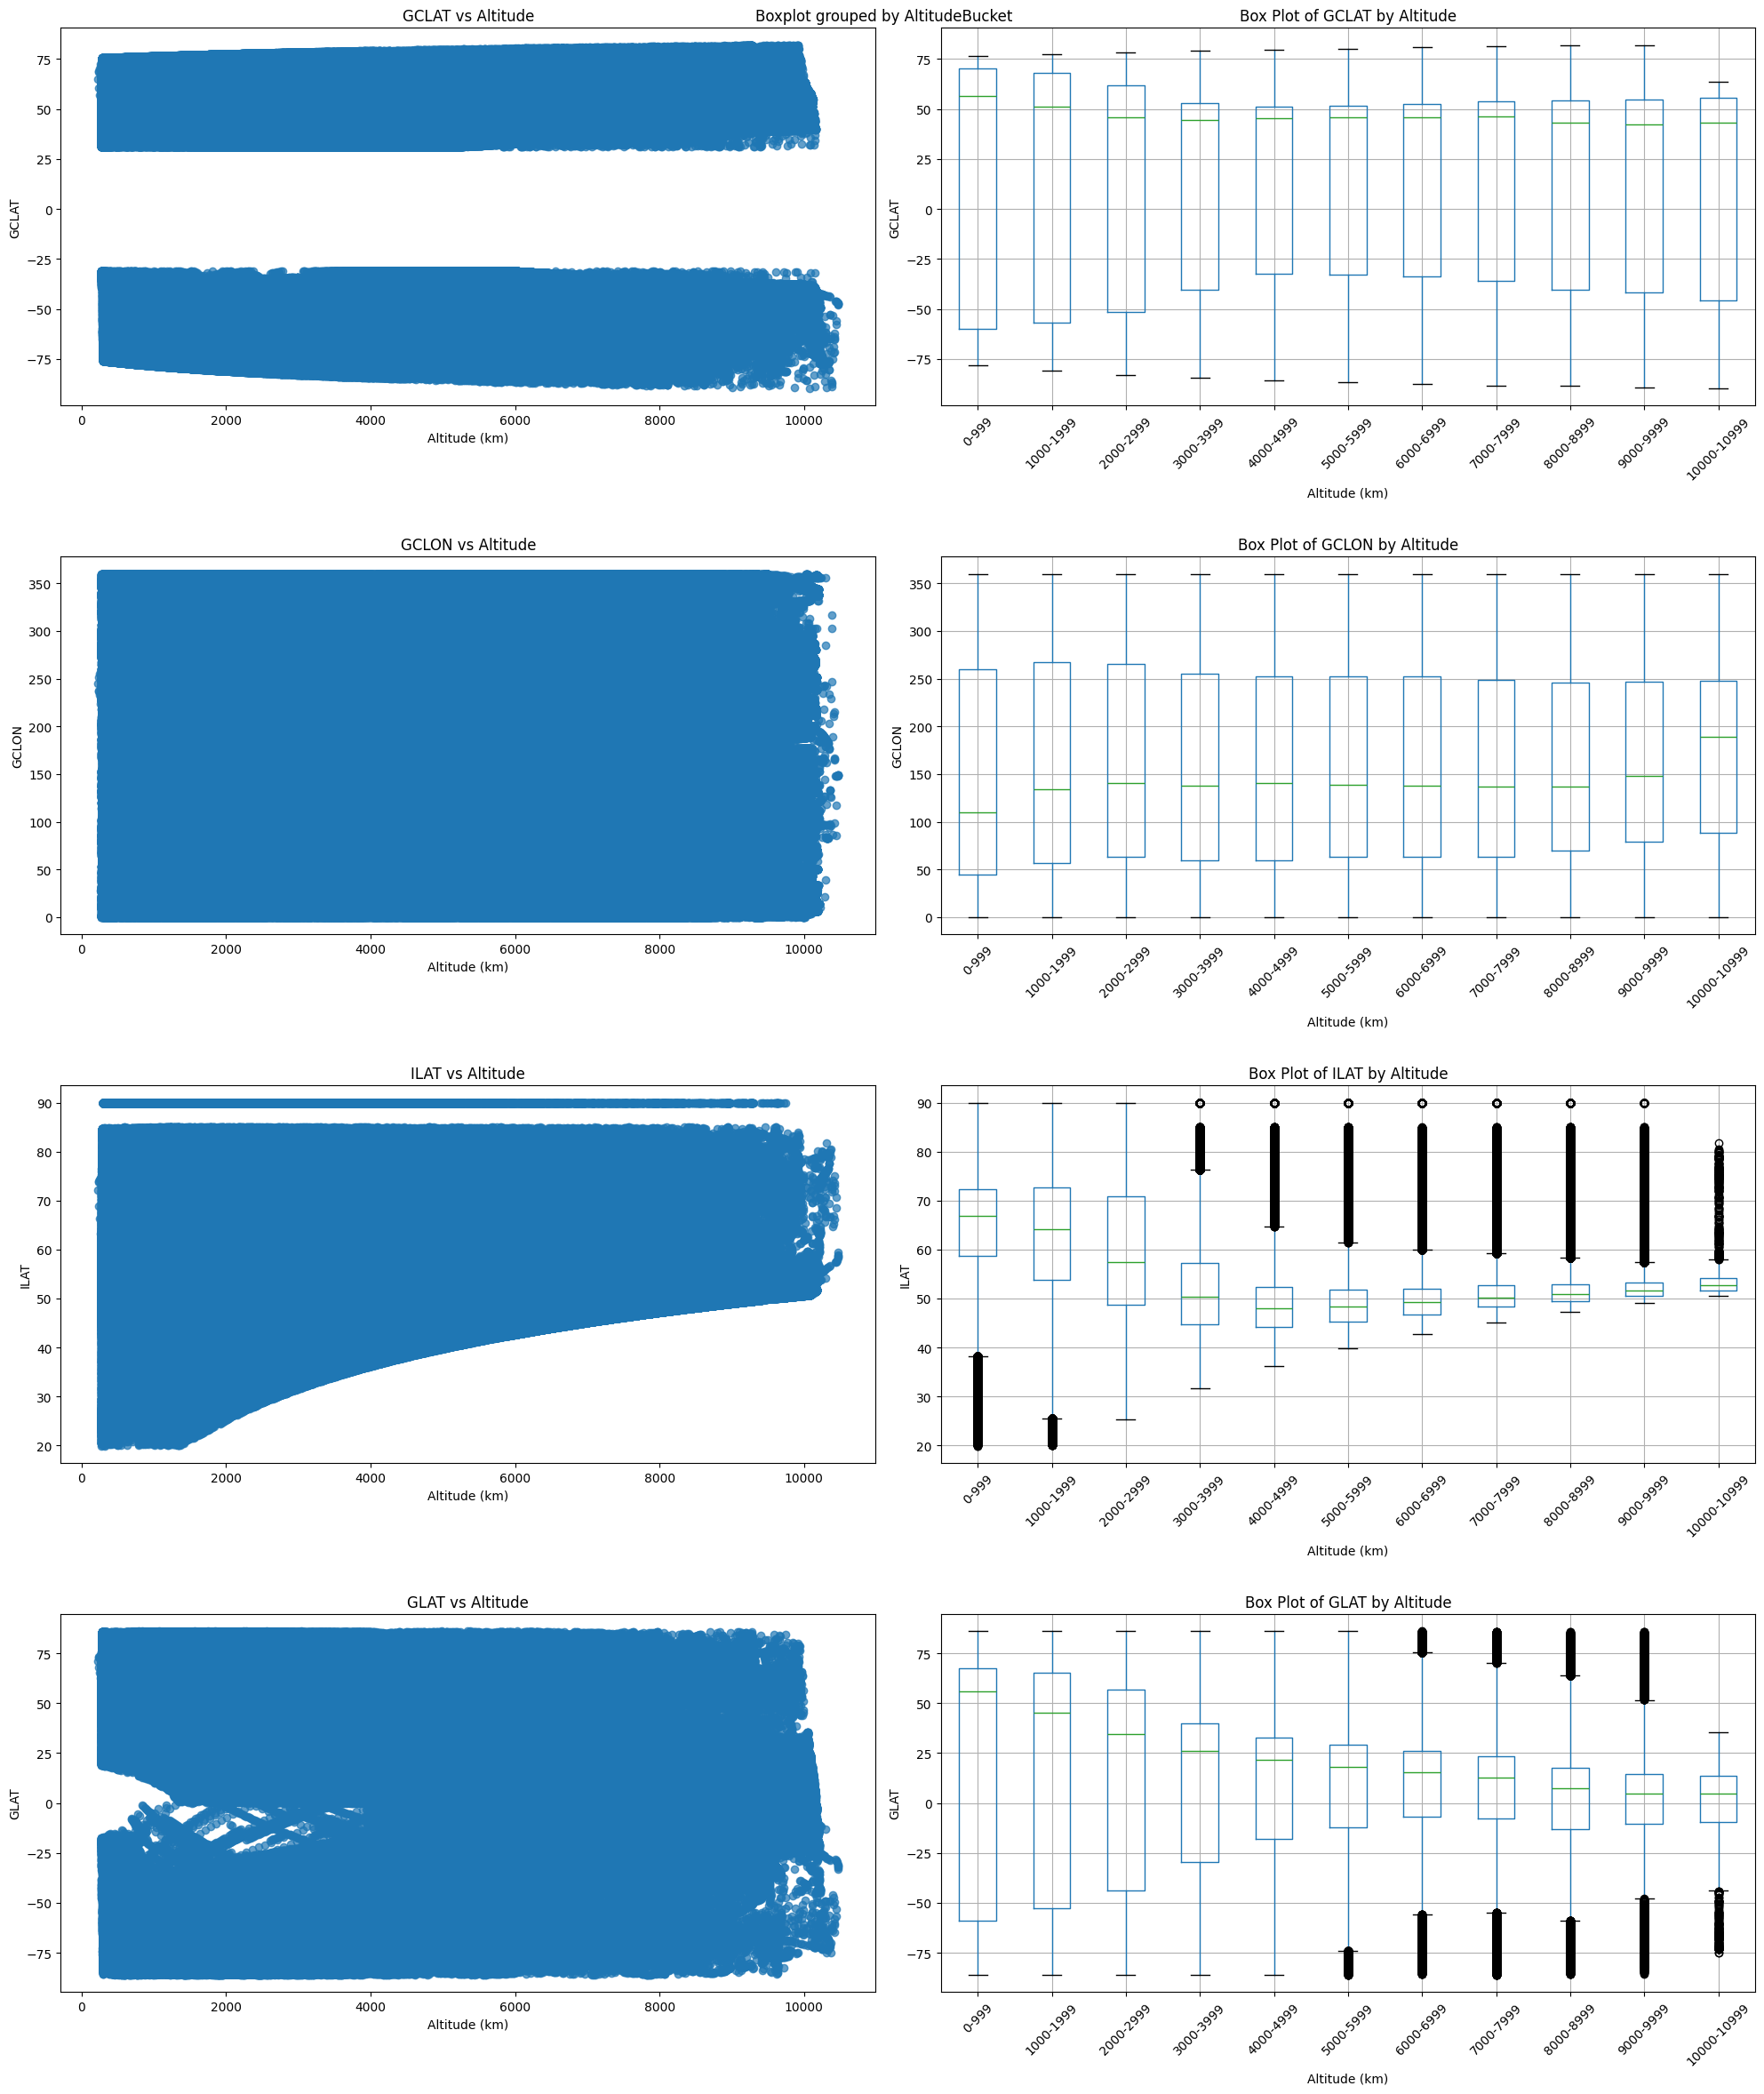

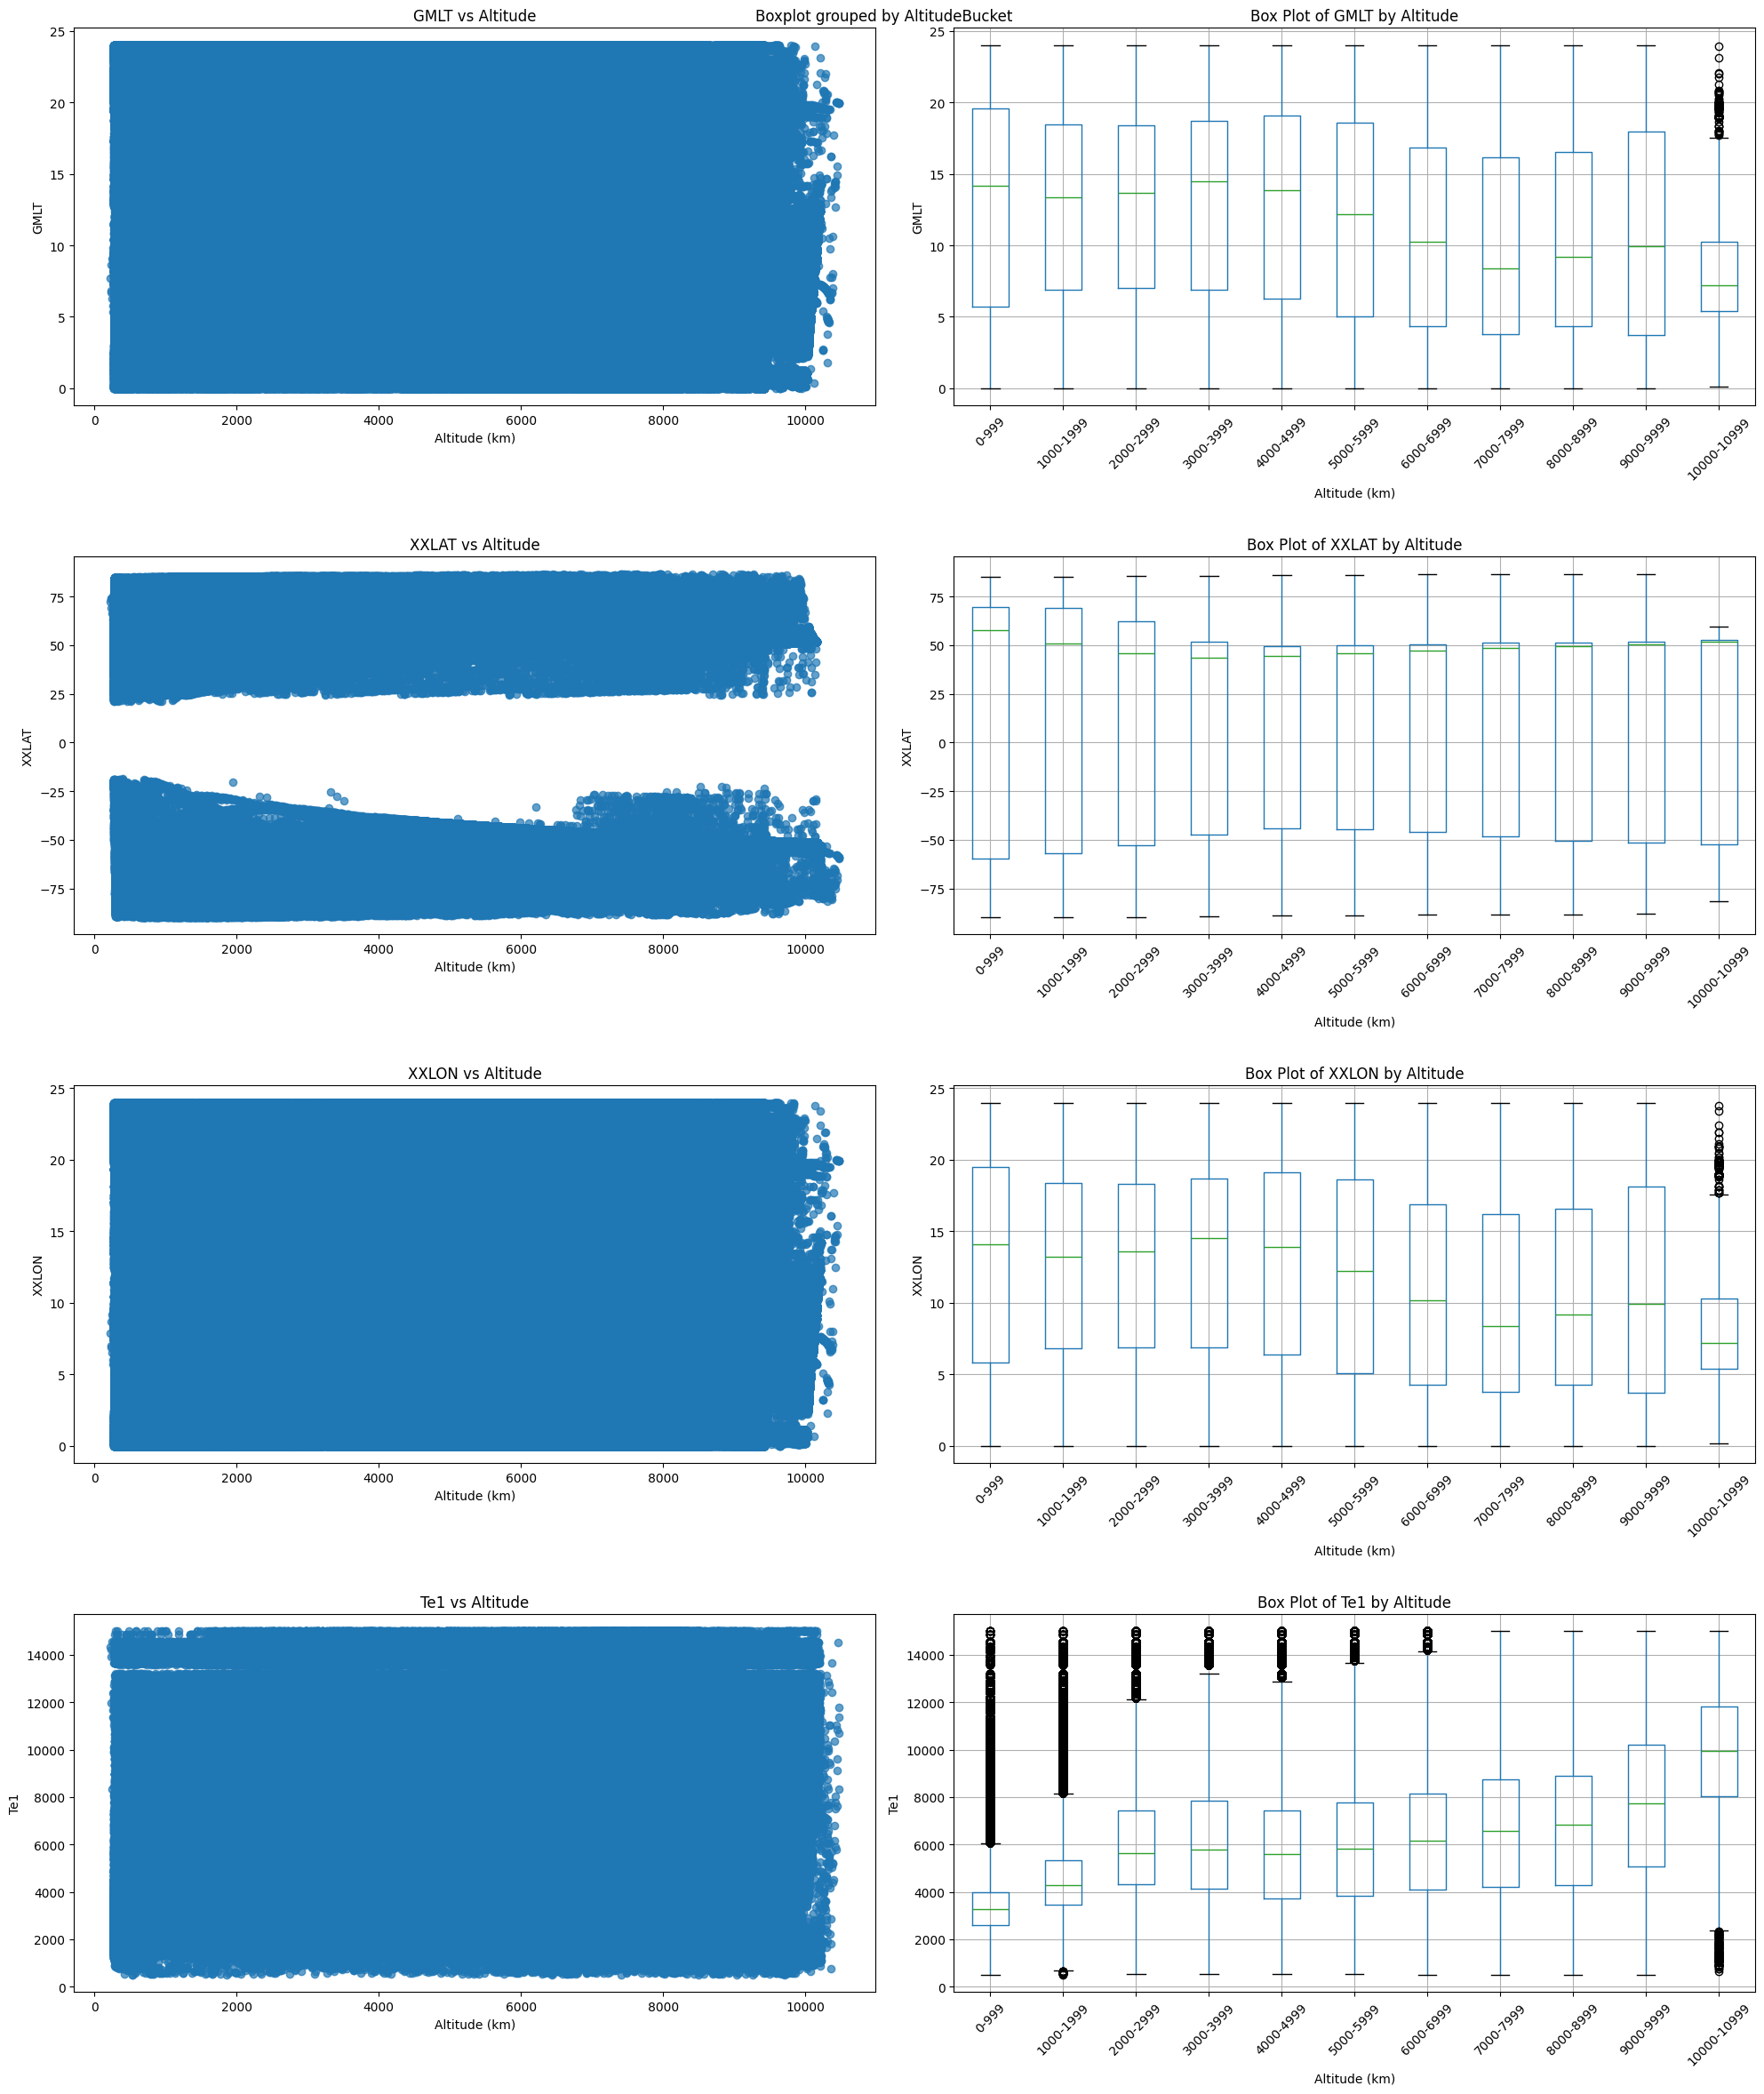

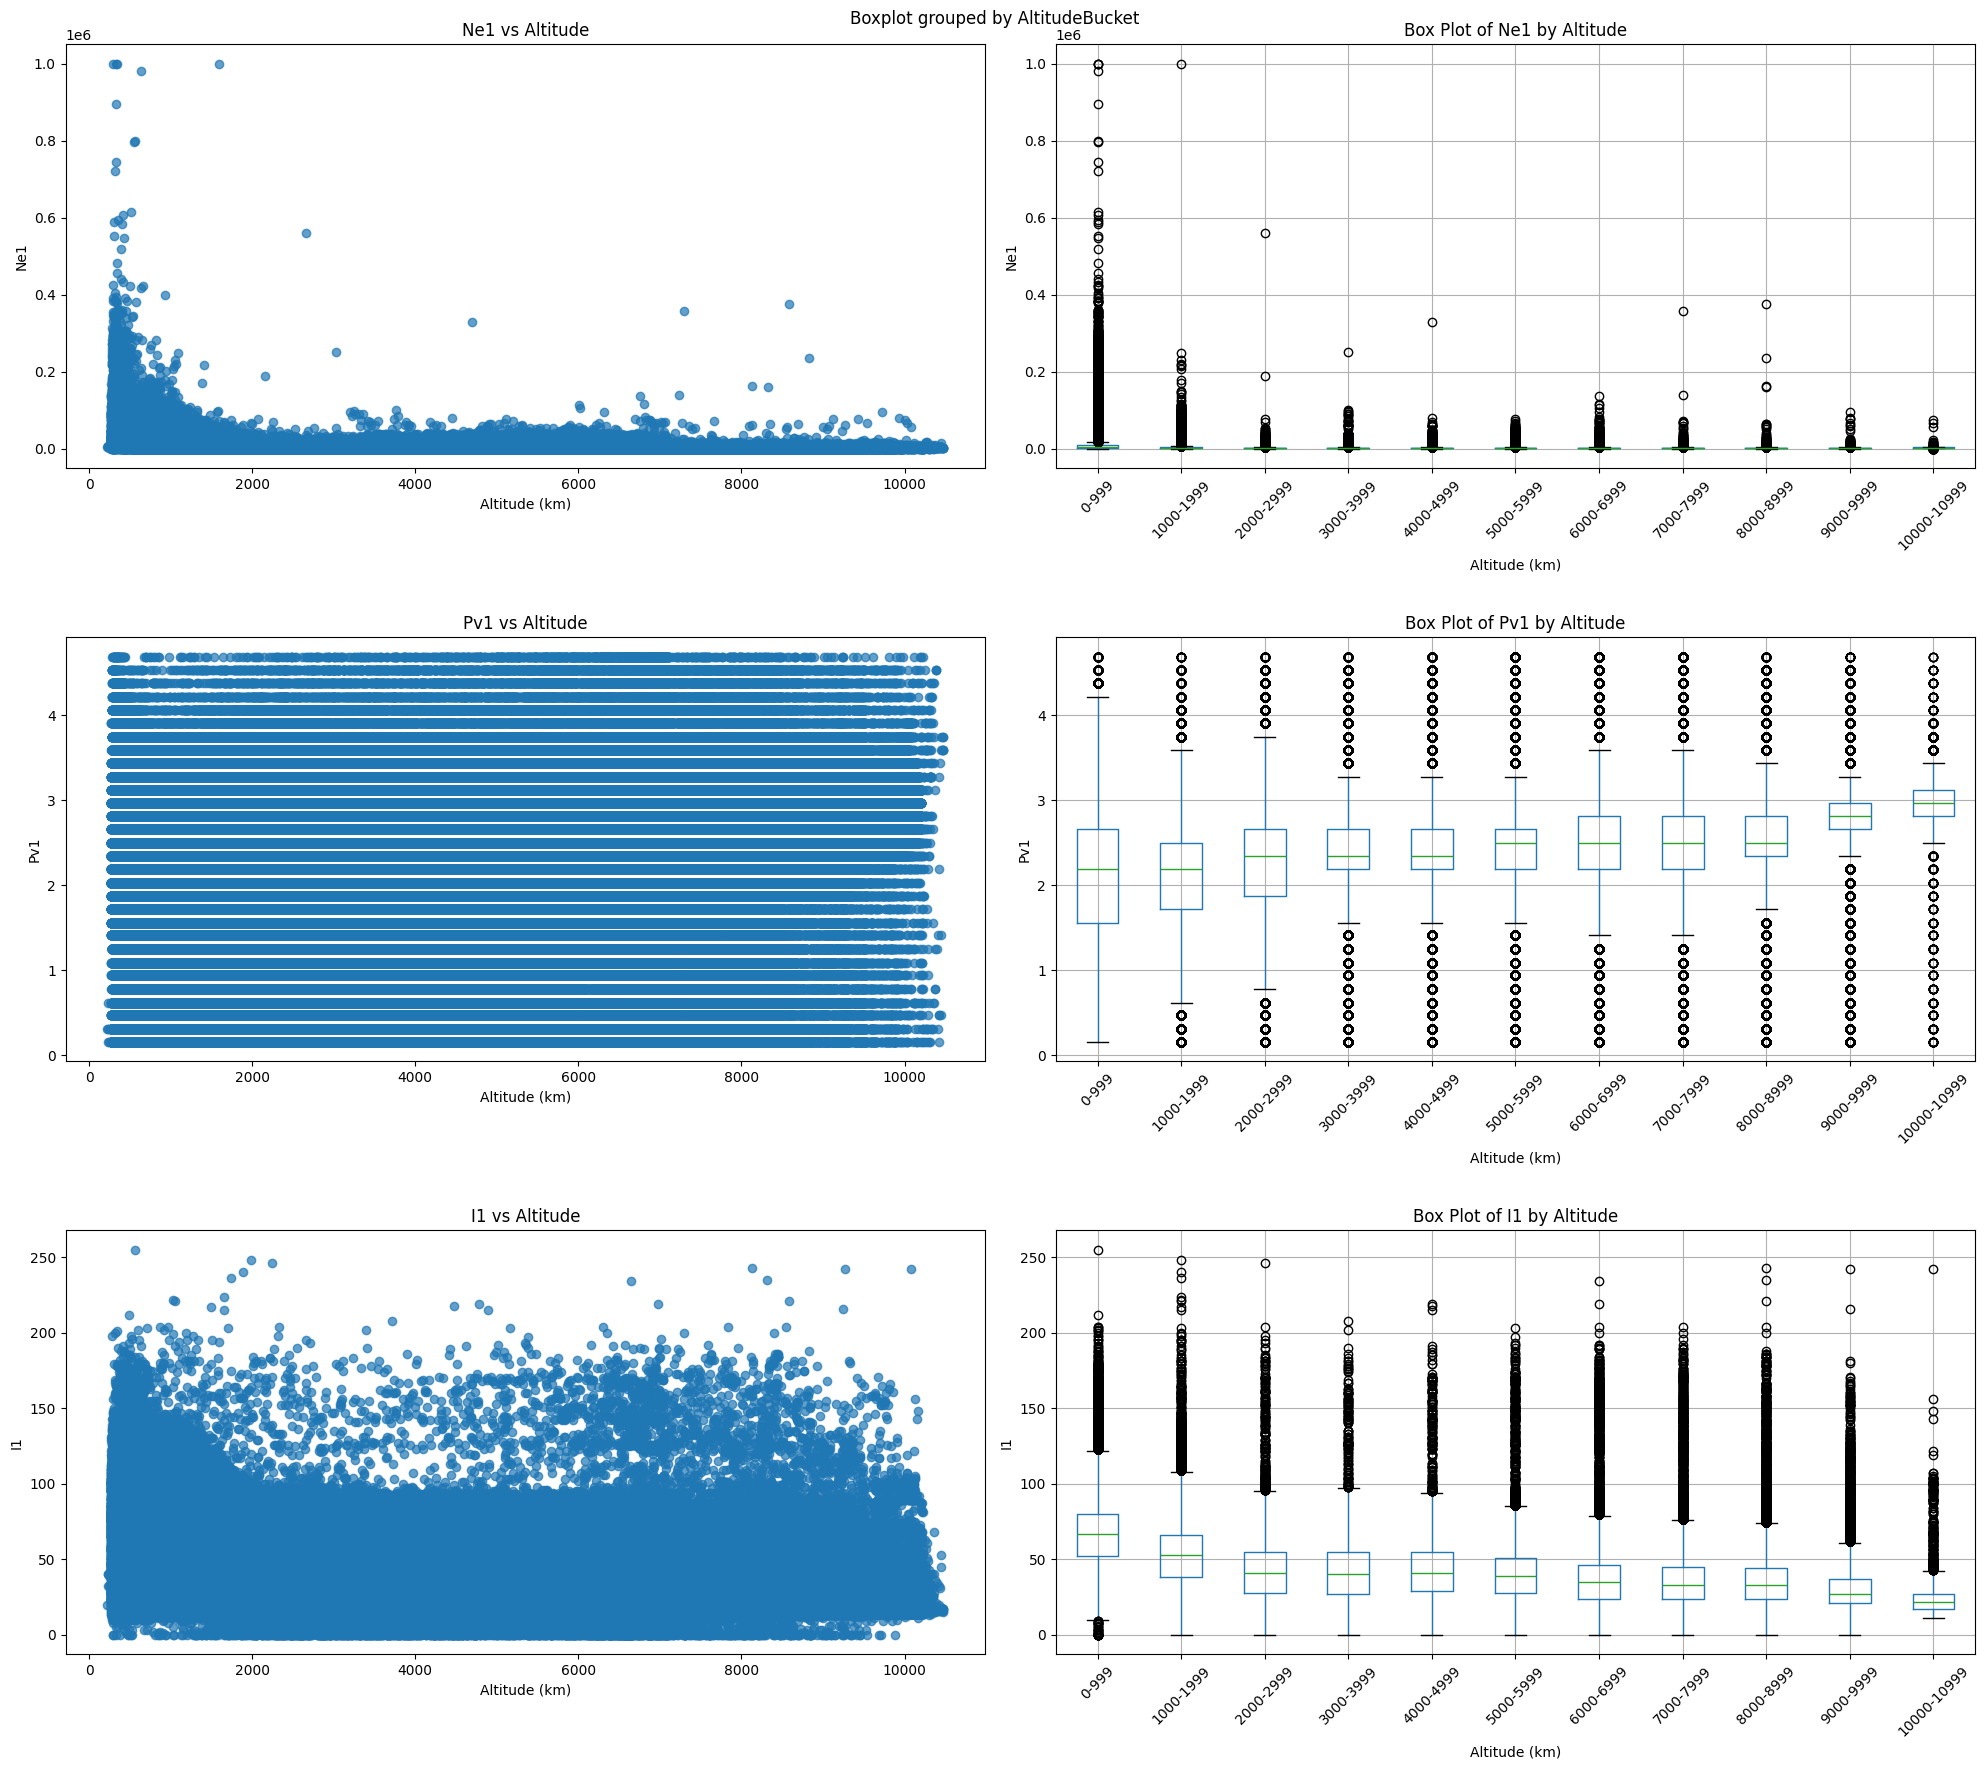

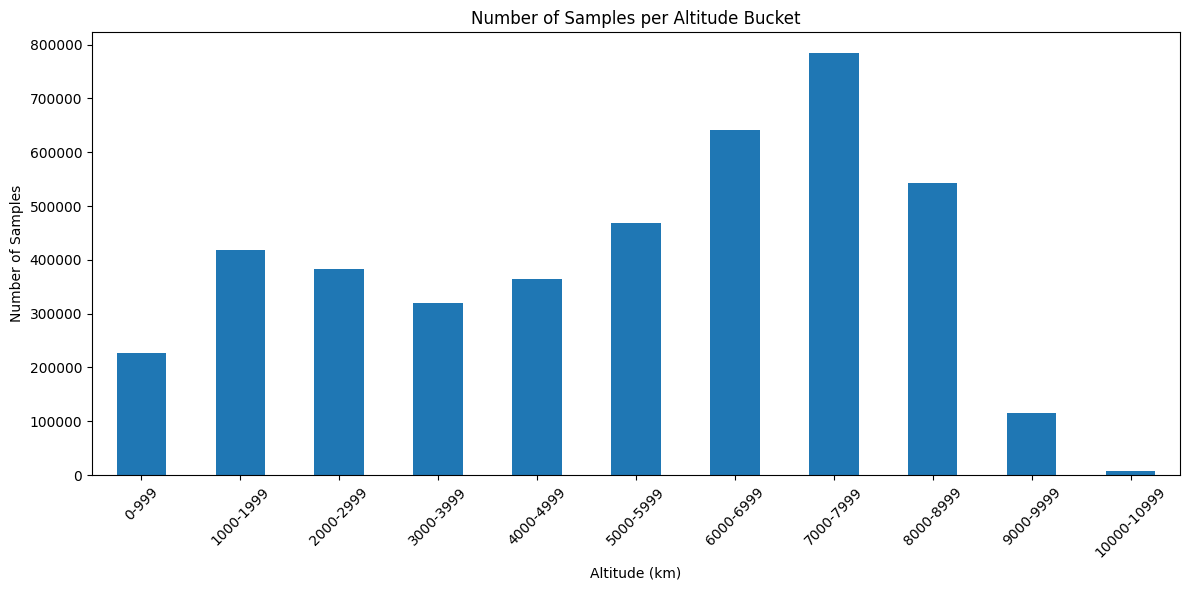

In [7]:
# Exploring filtering based on altitude

# Function to plot a subset of columns
def plot_subset(columns_subset):
    plt.figure(figsize=(20, 6 * len(columns_subset)))
    for i, column in enumerate(columns_subset):
        # Scatter plot
        plt.subplot(len(columns_subset), 2, 2*i + 1)
        plt.scatter(df['Altitude'], df[column], alpha=0.7)
        plt.title(f'{column} vs Altitude')
        plt.xlabel('Altitude (km)')
        plt.ylabel(column)
        
        # Box plot
        plt.subplot(len(columns_subset), 2, 2*i + 2)
        df['AltitudeBucket'] = pd.cut(df['Altitude'], 
                                                bins=range(0, int(df['Altitude'].max()) + 1000, 1000),
                                                labels=[f'{i}-{i+999}' for i in range(0, int(df['Altitude'].max()), 1000)])
        df.boxplot(column=column, by='AltitudeBucket', ax=plt.gca())
        plt.title(f'Box Plot of {column} by Altitude')
        plt.xlabel('Altitude (km)')
        plt.ylabel(column)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()

# Split columns into subsets of 4
column_subsets = [col for col in df.columns if col not in ['DateFormatted', 'Altitude']]
column_subsets = [column_subsets[i:i+4] for i in range(0, len(column_subsets), 4)]

# Plot each subset
for subset in column_subsets:
    plot_subset(subset)

# Plot number of samples per altitude bucket
plt.figure(figsize=(12, 6))
altitude_counts = df['AltitudeBucket'].value_counts().sort_index()
altitude_counts.plot(kind='bar')
plt.title('Number of Samples per Altitude Bucket')
plt.xlabel('Altitude (km)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove the 'AltitudeBucket' column after use
df = df.drop('AltitudeBucket', axis=1)
